# Lens Dataset Loader

This notebook defines a **Lens Dataset Loader**, which can:
- Convert NPY images to PyTorch tensors
- Apply transformations (normalization)
- Visualize a sample image

### Dataset Structure:
Samples/  
 ├── sample1.npy  
 ├── sample2.npy ...



In [1]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Define LensDataset class.

In [2]:
class LensDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir: Path to dataset directory (e.g., "../Samples")
            transform: Transformations on images
        """
        self.root_dir = root_dir
        self.transform = transform
        self.data = sorted([os.path.join(root_dir, f) for f in os.listdir(root_dir) if f.endswith(".npy")])

        if not self.data:
            raise RuntimeError(f"No NPY files found in {root_dir}")

    def __len__(self):
        return len(self.data)
        
    def __getitem__(self, idx):
        """
        Args:
            idx: Image index
        Returns:
            image: Image tensor of shape (1, H, W)
        """
        path = self.data[idx]
        image = np.load(path).astype(np.float32)

        if self.transform:
            image = self.transform(torch.tensor(image))

        return image

    def vis_item(self, idx):
        """ Visualize an image from the dataset """
        image = np.load(self.data[idx])

        if image.ndim == 3 and image.shape[0] == 1:
            image = image.squeeze(0)  # Converts (1, H, W) → (H, W)

        plt.imshow(image, cmap="gray")
        plt.title(f"Sample {idx}")
        plt.axis("off")
        plt.show()

Apply transformations and load dataset.

In [4]:
# Define transformations
transform = transforms.Compose([
    transforms.Normalize((0.5,), (0.5,))  # Normalize
])

dataset = LensDataset("../../Samples", transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Test loading
test_batch = next(iter(dataloader))
print(f"Batch size: {test_batch.shape}")

Batch size: torch.Size([32, 1, 150, 150])


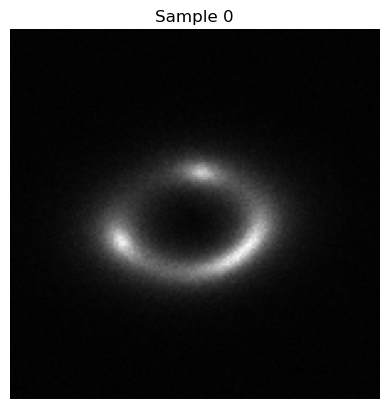

In [5]:
# Visualize an item
dataset.vis_item(0)